In [7]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

## Fourier Transform


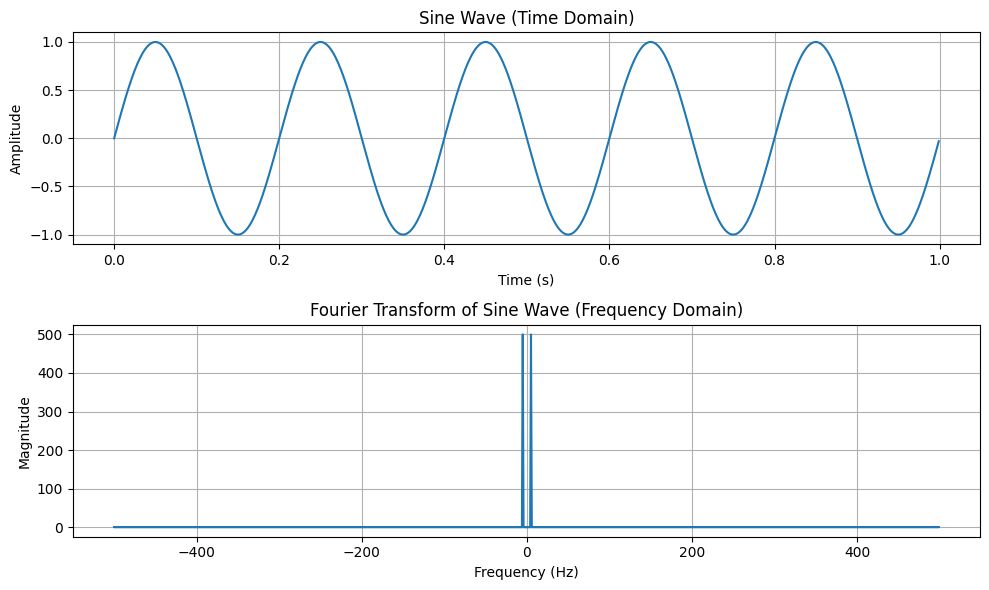

In [8]:
# Parameters for the sine wave
frequency = 5  # Frequency of the sine wave in Hz
amplitude = 1.0  # Amplitude of the sine wave
sampling_rate = 1000  # Sampling rate in samples per second
duration = 1.0  # Duration of the sine wave in seconds

# Time values for the sine wave
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Generate the sine wave y = Asin(wt)
sine_wave = amplitude * np.sin(2 * np.pi * frequency * t)

# Compute the Fourier transform of the sine wave
f_transform = np.fft.fft(sine_wave)
frequencies = np.fft.fftfreq(len(t), d=1.0/sampling_rate)

# Plot the sine wave and its Fourier transform
plt.figure(figsize=(10, 6))

# Plot the sine wave in the time domain
plt.subplot(2, 1, 1)
plt.plot(t, sine_wave)
plt.title('Sine Wave (Time Domain)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()

# Plot the Fourier transform of the sine wave in the frequency domain
plt.subplot(2, 1, 2)
plt.plot(frequencies, np.abs(f_transform))
plt.title('Fourier Transform of Sine Wave (Frequency Domain)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()

plt.tight_layout()
plt.show()


In [9]:
def mag_sep(path):
    image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)

    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20*np.log(np.abs(fshift))
    plt.subplot(121),plt.imshow(image, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.show()


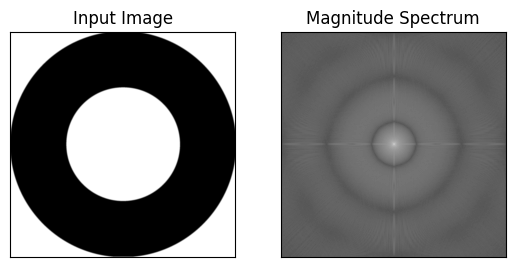

In [10]:
mag_sep("circle.png")

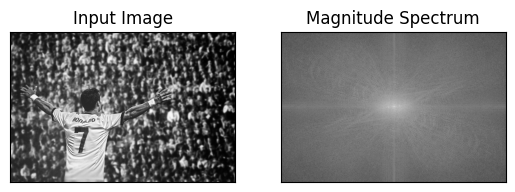

In [11]:
mag_sep("cr7.jpg")

No, in the Fourier transform spectrum, the bright lines in the center of the image do not indicate low-frequency components. Instead, they represent the DC (Direct Current) component or the zero-frequency component of the signal, which is not related to any specific frequency.

Let's clarify the interpretation of the Fourier transform spectrum for images:

1. DC Component: The DC component represents the average intensity or the overall brightness of the image. It appears as a bright spot at the center of the Fourier transform spectrum. This component is associated with a frequency of zero.

2. Low-Frequency Components: The low-frequency components of the image (e.g., slow variations, smooth transitions, large-scale patterns) are represented by bright areas closer to the DC component in the Fourier transform spectrum. These components correspond to lower frequencies and are typically found closer to the center of the spectrum.

3. High-Frequency Components: The high-frequency components of the image (e.g., sharp edges, fine details, small-scale patterns) are represented by bright areas farther from the DC component in the Fourier transform spectrum. These components correspond to higher frequencies and are usually found farther away from the center of the spectrum.

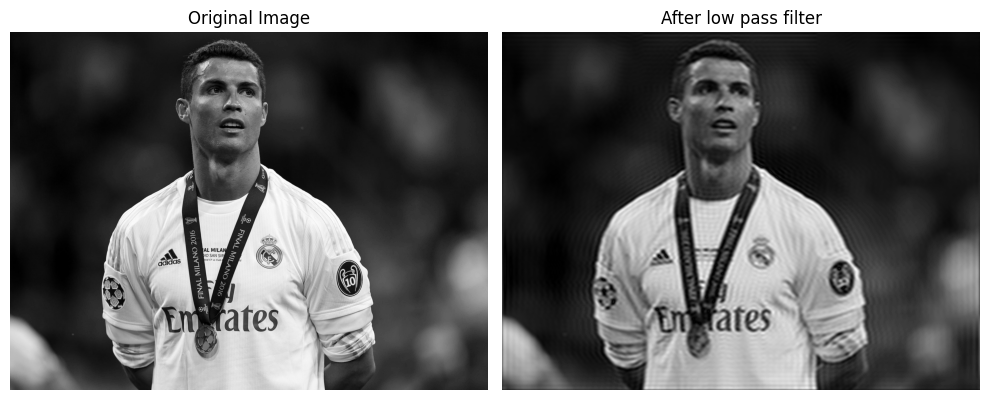

In [63]:
def pass_filter(path, cutoff,high=True):
    """
    path: path to image
    cutoff: radius of filter (but not circular)
    high: True for high pass filter, False for low pass filter
    """
    image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)

    # Perform Fourier Transform
    f_transform = np.fft.fft2(image)
    # Shift zero frequency components to center
    f_transform_shifted = np.fft.fftshift(f_transform)
    
    # Create high-pass filter mask
    rows, cols = image.shape
    crow, ccol = rows // 2, cols // 2
    if high: mask = np.ones((rows, cols), np.uint8)
    else: mask = np.zeros((rows, cols), np.uint8)
    mask[crow - cutoff:crow + cutoff, ccol - cutoff:ccol + cutoff] = 0 if high else 1
    
    # Apply the filter in the frequency domain
    f_transform_shifted_filtered = f_transform_shifted * mask
    # Inverse Fourier Transform
    f_ishift = np.fft.ifftshift(f_transform_shifted_filtered)
    filtered_image = np.fft.ifft2(f_ishift)
    filtered_image = np.abs(filtered_image)
    
    # Plot the images
    plt.figure(figsize=(10, 6))
    
    # Original Image
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Fourier Transform (Magnitude Spectrum) of Original Image
    # plt.subplot(2, 2, 2)
    # f_transform_magnitude = np.abs(f_transform_shifted)
    # plt.imshow(np.log(1 + f_transform_magnitude), cmap='gray')
    # plt.title('Fourier Transform')
    # plt.axis('off')
    
    # High-Pass Filtered Image in Spatial Domain
    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image, cmap='gray')
    # plt.title(f'{"High" if high else "Low"}Pass Filtered Image (Spatial Domain)')
    plt.title("After low pass filter")
    plt.axis('off')
    
    # High-Pass Filtered Fourier Transform (Magnitude Spectrum)
    # plt.subplot(2, 2, 4)
    # f_transform_magnitude_filtered = np.abs(f_transform_shifted_filtered)
    # plt.imshow(20*np.log(1 + f_transform_magnitude_filtered), cmap='gray')
    # plt.title(f'{"High" if high else "Low"}-pass Filtered Fourier Transform (radius={cutoff})')
    # plt.axis('off')
    
    
    plt.tight_layout()
    plt.show()

cutoff_frequency = 80
pass_filter("cr2.jpg", cutoff_frequency,False)


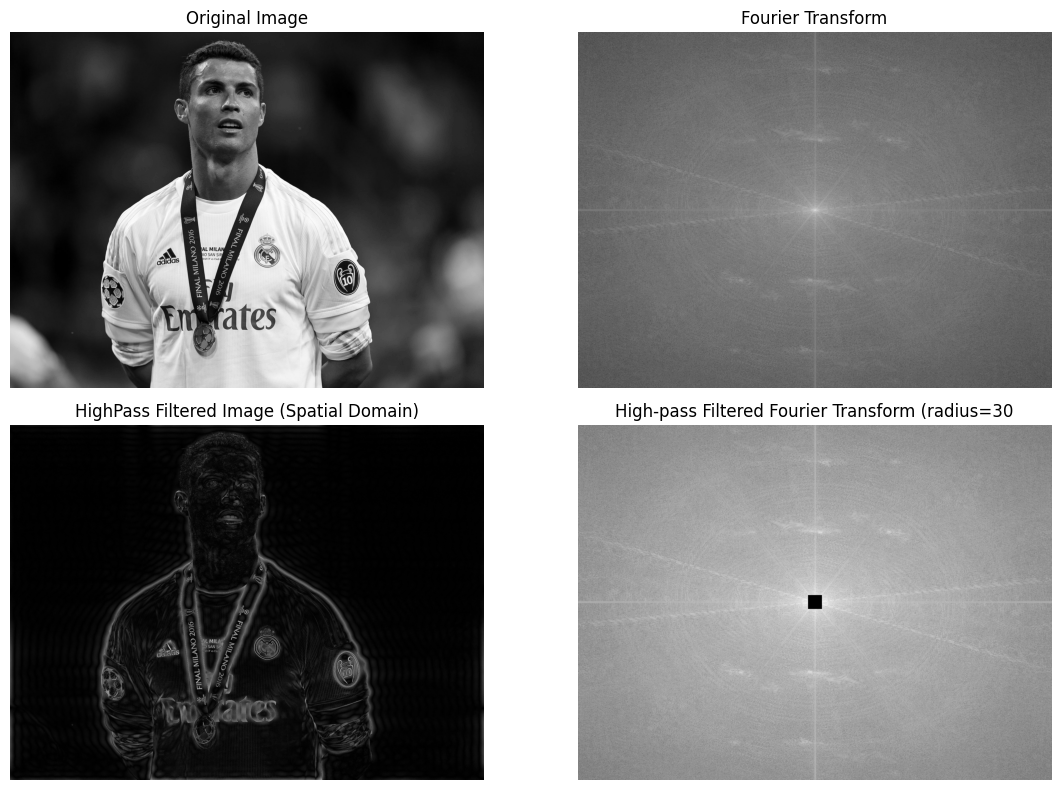

In [40]:
# Apply the high-pass filter with a cutoff value (adjust as needed)
cutoff_frequency = 30
pass_filter("cr2.jpg", cutoff_frequency,True)

In [13]:
cutoff = 20
rows, cols = (200,200)
crow, ccol = rows // 2, cols // 2
mask = np.zeros((rows, cols), np.uint8)
mask[crow - cutoff:crow + cutoff, ccol - cutoff:ccol + cutoff] = 1

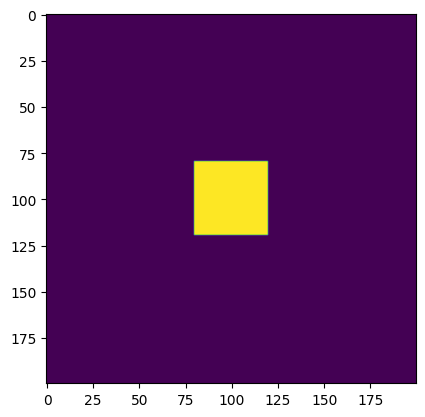

In [14]:
plt.imshow(mask)

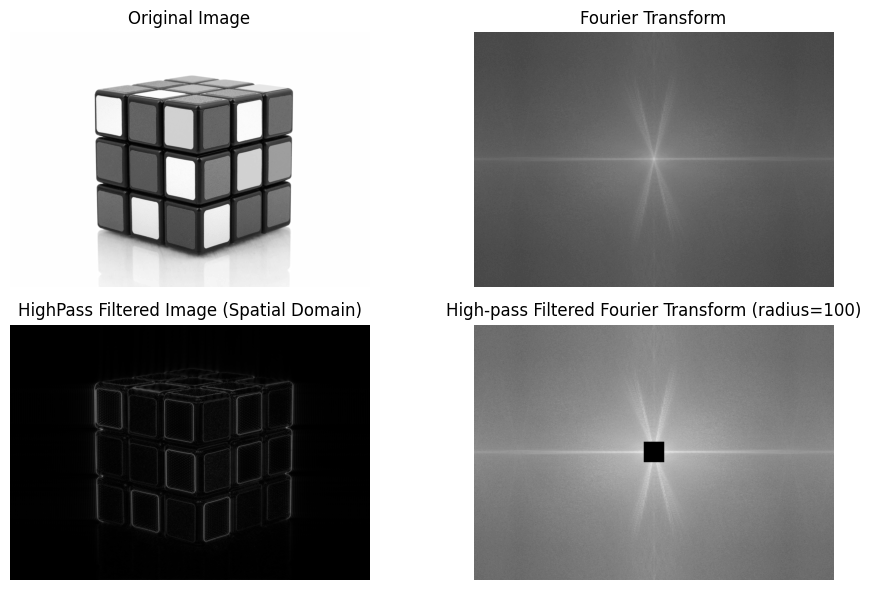

In [47]:
cutoff_frequency = 100
pass_filter("cube.jpg", cutoff_frequency,True)

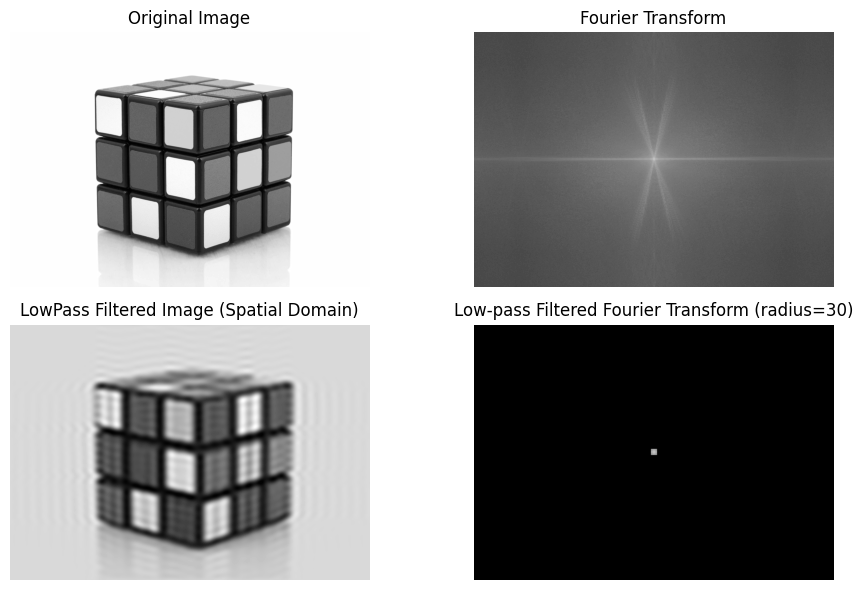

In [46]:
cutoff_frequency = 30
pass_filter("cube.jpg", cutoff_frequency,False)

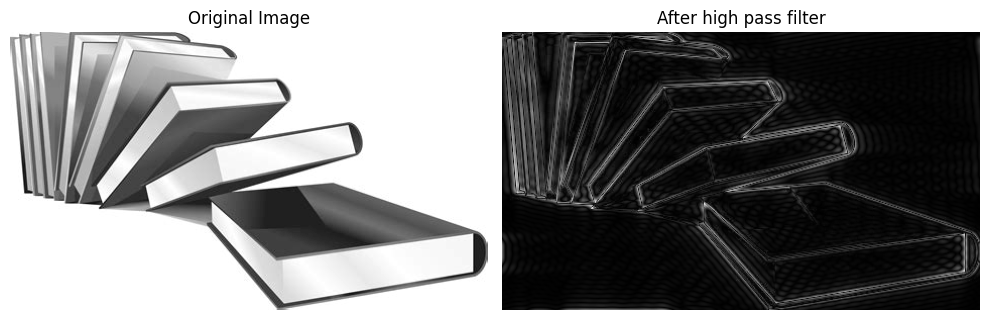

In [62]:
pass_filter("books.jpg",30,True)

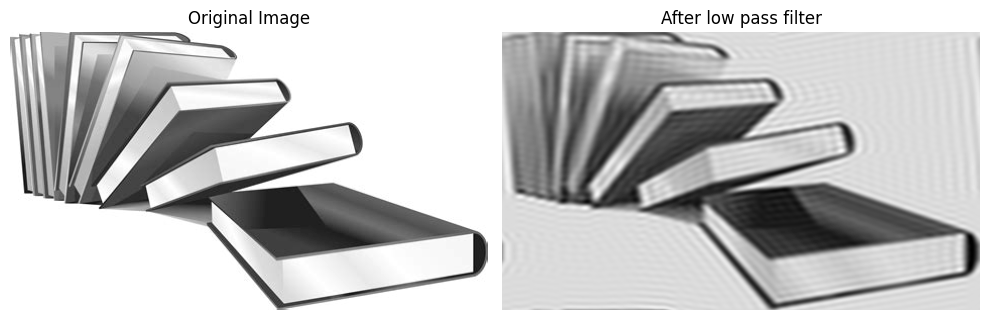

In [64]:
pass_filter("books.jpg",40,False)